<a href="https://colab.research.google.com/github/Abdillah021/Portofolio-data-analyst/blob/02_time_series_forecasting/Time_Series_AbdillahCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Part 1

In [ ]:
path = '/content/drive/MyDrive/Data set/Time series/googl_data_2020_2025.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path)
print(df.head(6))
print(df.tail(6))


                       Price    Adj Close        Close         High  \
0                     Ticker        GOOGL        GOOGL        GOOGL   
1                       Date          NaN          NaN          NaN   
2  2020-01-02 00:00:00+00:00  68.18682098  68.43399811  68.43399811   
3  2020-01-03 00:00:00+00:00  67.83010101   68.0759964      68.6875   
4  2020-01-06 00:00:00+00:00  69.63805389  69.89050293  69.91600037   
5  2020-01-07 00:00:00+00:00  69.50354767  69.75550079  70.17500305   

           Low         Open    Volume  
0        GOOGL        GOOGL     GOOGL  
1          NaN          NaN       NaN  
2  67.32450104  67.42050171  27278000  
3  67.36599731  67.40000153  23408000  
4  67.55000305  67.58149719  46768000  
5  69.57800293  70.02300262  34330000  
                          Price    Adj Close        Close         High  \
1254  2024-12-23 00:00:00+00:00  194.6300049  194.6300049  195.1000061   
1255  2024-12-24 00:00:00+00:00  196.1100006  196.1100006  196.1100006   


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [ ]:
df.describe()

,Price,Adj Close,Close,High,Low,Open,Volume
count,1260,1259,1259,1259,1259,1259,1259
unique,1260,1240,1236,1224,1229,1221,1252
top,2024-12-31 00:00:00+00:00,105.5872421,105.9700012,138,128.9600067,138.5,22288000
freq,1,3,3,3,2,3,3


In [ ]:
df.columns

Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
df.isnull().sum()

,0
Price,0
Adj Close,1
Close,1
High,1
Low,1
Open,1
Volume,1


In [ ]:
df.dtypes # df masih bertype objec perlu di rubah price --> date dan sisanya ke numeric

,0
Price,object
Adj Close,object
Close,object
High,object
Low,object
Open,object
Volume,object


In [ ]:
df.columns = df.iloc[0] # teknik umum ketika header file CSV sebenarnya ada di baris pertama data
df = df[2:].reset_index(drop=True) #memilih semua baris mulai dari baris ketiga (indeks 2) hingga akhir DataFrame
df.head()

,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
0,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
1,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
3,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
4,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000


In [ ]:
df.columns = ["Date", "Adj Close", "Close", "High", "Low", "Open", "Volume"]
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
1,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
3,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
4,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

#Argumen errors='coerce' memberi tahu fungsi untuk mengubah nilai apa pun
#yang tidak dapat diubah menjadi angka menjadi NaN (Not a Number)

numeric_columns = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.dtypes

,0
Date,"datetime64[ns, UTC]"
Adj Close,float64
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64


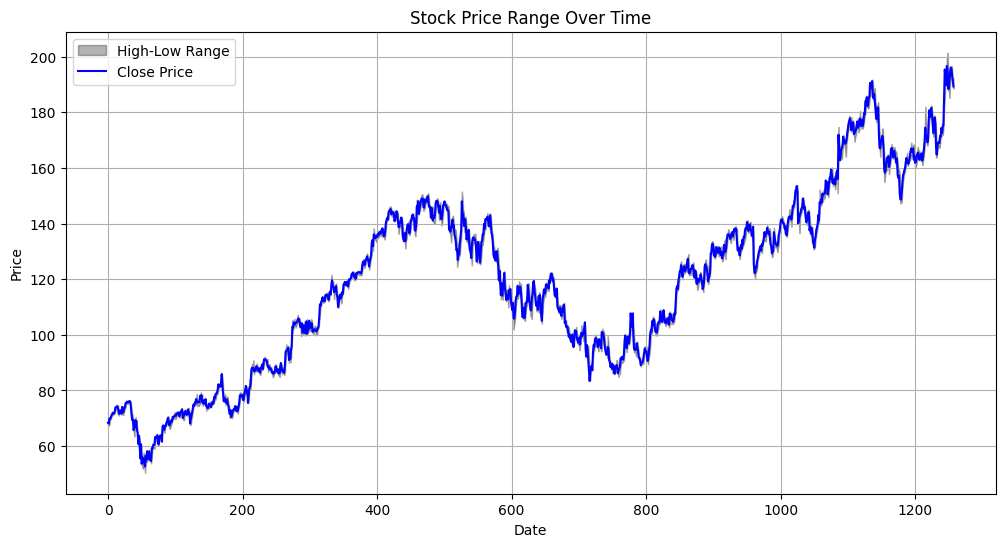

In [ ]:
plt.figure(figsize=(12, 6))
plt.fill_between(df.index, df['High'], df['Low'], color='black', alpha=0.3, label='High-Low Range')
plt.plot(df.index, df['Close'], color='blue', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Range Over Time')
plt.legend()
plt.grid()
plt.show()

### ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1258
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2844.123
Date:                Wed, 23 Jul 2025   AIC                           5694.247
Time:                        15:38:01   BIC                           5709.656
Sample:                             0   HQIC                          5700.038
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8211      0.149      5.520      0.000       0.530       1.113
ma.L1         -0.8508      0.138     -6.176      0.000      -1.121      -0.581
sigma2         5.4052      0.121     44.740      0.0

In [ ]:
#prediksi
forecast = model_fit.forecast(steps=60)
print(forecast)

1258    189.341986
1259    189.376460
1260    189.404768
1261    189.428012
1262    189.447100
1263    189.462773
1264    189.475643
1265    189.486211
1266    189.494889
1267    189.502015
1268    189.507866
1269    189.512671
1270    189.516617
1271    189.519856
1272    189.522517
1273    189.524701
1274    189.526495
1275    189.527968
1276    189.529177
1277    189.530170
1278    189.530986
1279    189.531656
1280    189.532206
1281    189.532657
1282    189.533028
1283    189.533332
1284    189.533582
1285    189.533788
1286    189.533956
1287    189.534095
1288    189.534208
1289    189.534302
1290    189.534378
1291    189.534441
1292    189.534493
1293    189.534535
1294    189.534570
1295    189.534599
1296    189.534622
1297    189.534642
1298    189.534657
1299    189.534670
1300    189.534681
1301    189.534690
1302    189.534697
1303    189.534703
1304    189.534708
1305    189.534712
1306    189.534715
1307    189.534718
1308    189.534720
1309    189.534722
1310    189.

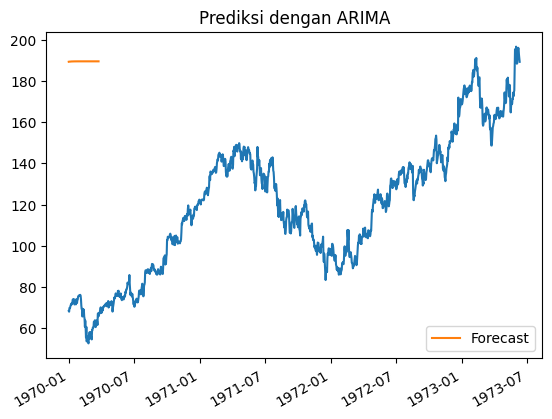

In [ ]:
df['Close'].plot(label = "Data Aktual")
forecast.index = pd.date_range(start= df.index[-1], periods=60, freq='B')
forecast.plot(label = "Forecast", legend=True)
plt.title("Prediksi dengan ARIMA")
plt.show()

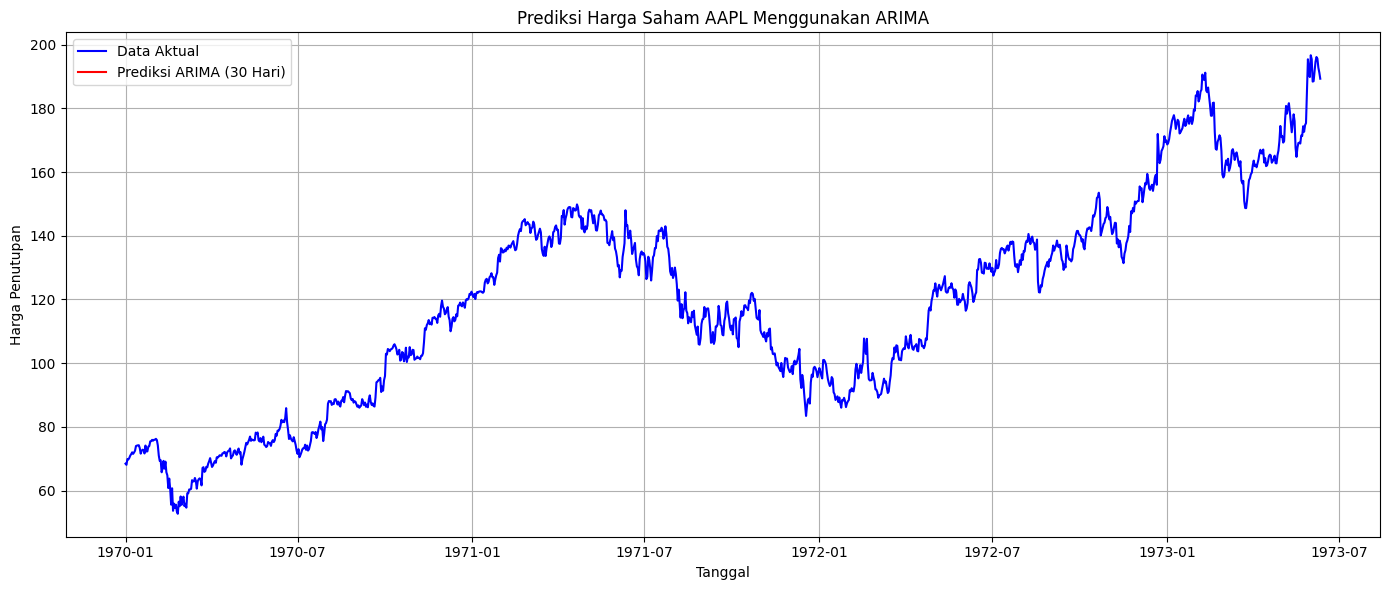

In [ ]:
# Prediksi 30 hari ke depan
forecast = model_fit.forecast(steps=15)

# Buat tanggal indeks untuk hasil prediksi
forecast_index = pd.date_range(start=df.index[-1], periods=90, freq='B')  # 'B' = hari kerja
forecast = pd.Series(forecast, index=forecast_index)

# Plot data aktual dan prediksi
plt.figure(figsize=(14,6))

# Plot data historis
plt.plot(df['Close'], label='Data Aktual', color='blue')

# Plot prediksi
plt.plot(forecast, label='Prediksi ARIMA (30 Hari)', color='red')

plt.title('Prediksi Harga Saham AAPL Menggunakan ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df1 = df.copy()
df1 = df1.reset_index() # Reset the index to make 'Date' a column
df1['Date'] = pd.to_datetime(df1['Date']).dt.tz_localize(None)

print(df1.head())
#aapl_df1 = aapl_df1[['Date', 'Close']] # select date dan close dari dataframe aapl_df1
df1 = df1.rename(columns={'Date': 'ds', 'Close': 'y'}) # mengubah nama date ke ds dan close ke y sesuai request dari prophet
print(df1.head())

   index       Date  Adj Close      Close       High        Low       Open  \
0      0 2020-01-02  68.186821  68.433998  68.433998  67.324501  67.420502   
1      1 2020-01-03  67.830101  68.075996  68.687500  67.365997  67.400002   
2      2 2020-01-06  69.638054  69.890503  69.916000  67.550003  67.581497   
3      3 2020-01-07  69.503548  69.755501  70.175003  69.578003  70.023003   
4      4 2020-01-08  69.998253  70.251999  70.592499  69.631500  69.740997   

     Volume  
0  27278000  
1  23408000  
2  46768000  
3  34330000  
4  35314000  
   index         ds  Adj Close          y       High        Low       Open  \
0      0 2020-01-02  68.186821  68.433998  68.433998  67.324501  67.420502   
1      1 2020-01-03  67.830101  68.075996  68.687500  67.365997  67.400002   
2      2 2020-01-06  69.638054  69.890503  69.916000  67.550003  67.581497   
3      3 2020-01-07  69.503548  69.755501  70.175003  69.578003  70.023003   
4      4 2020-01-08  69.998253  70.251999  70.592499  69.

### Prophet

In [ ]:
from prophet import Prophet
model = Prophet()
model.fit(df1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo0tqx1ht/t41dgldk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo0tqx1ht/1uhmdzc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60082', 'data', 'file=/tmp/tmpo0tqx1ht/t41dgldk.json', 'init=/tmp/tmpo0tqx1ht/1uhmdzc4.json', 'output', 'file=/tmp/tmpo0tqx1ht/prophet_modelle1jws8f/prophet_model-20250723153805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:38:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:38:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model_df1 = Prophet()
model_df1.fit(df1)
future_df1 = model_df1.make_future_dataframe(periods=30)
forecast_aapl = model_df1.predict(future_df1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo0tqx1ht/hlch_cpf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo0tqx1ht/k247_gsc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68011', 'data', 'file=/tmp/tmpo0tqx1ht/hlch_cpf.json', 'init=/tmp/tmpo0tqx1ht/k247_gsc.json', 'output', 'file=/tmp/tmpo0tqx1ht/prophet_modeltn8bu8xv/prophet_model-20250723153806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:38:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:38:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


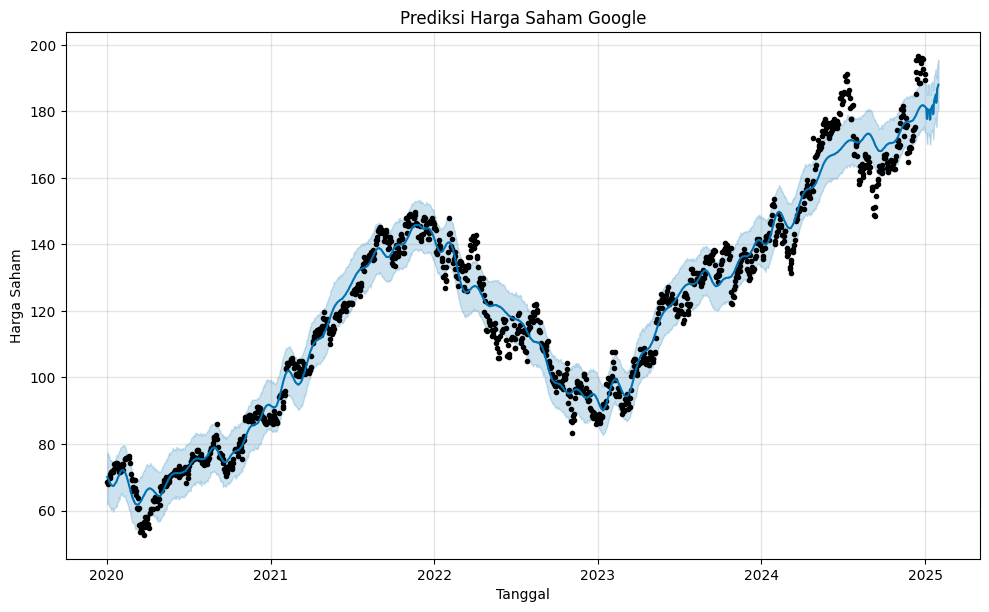

In [ ]:
model_df1.plot(forecast_aapl, xlabel='Tanggal', ylabel='Harga Saham')
plt.title("Prediksi Harga Saham Google")
plt.show()


### LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import numpy as np # Import numpy

# Use the 'Close' price for the model input
data = df['Close'].values.reshape(-1, 1) # Reshape to a 2D array for scaling

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
# Define sequence length (number of timesteps)
sequence_length = 60 # You can adjust this based on your data and desired lookback

X_lstm = []
y_lstm = []

for i in range(sequence_length, len(scaled_data)):
    X_lstm.append(scaled_data[i-sequence_length:i, 0])
    y_lstm.append(scaled_data[i, 0])

# Convert to numpy arrays
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Reshape X_lstm for LSTM layer (samples, timesteps, features)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))


model = Sequential()
# Update the input shape to reflect the sequence length and number of features (which is 1)
model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50)) # No return_sequences for the last LSTM layer
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Use the prepared X_lstm and y_lstm for training
model.fit(X_lstm, y_lstm, epochs=20, batch_size=32)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0655
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0047
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0037
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0036
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0032
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0033
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0029
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0030
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0027
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0026
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0032
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0027
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0029
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0025
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0026
Epoch 16/20
38/

In [ ]:
# prediksi 5 hari
last_60 = scaled_data[-60:]
input_seq = last_60.copy()
predictions = []

for _ in range(30): # prediksi harinya
    pred_input = input_seq[-60:].reshape((1, 60, 1))
    next_pred = model.predict(pred_input, verbose=0)
    predictions.append(next_pred[0, 0])
    input_seq = np.append(input_seq, next_pred)

# Balikkan ke skala harga sebenarnya
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

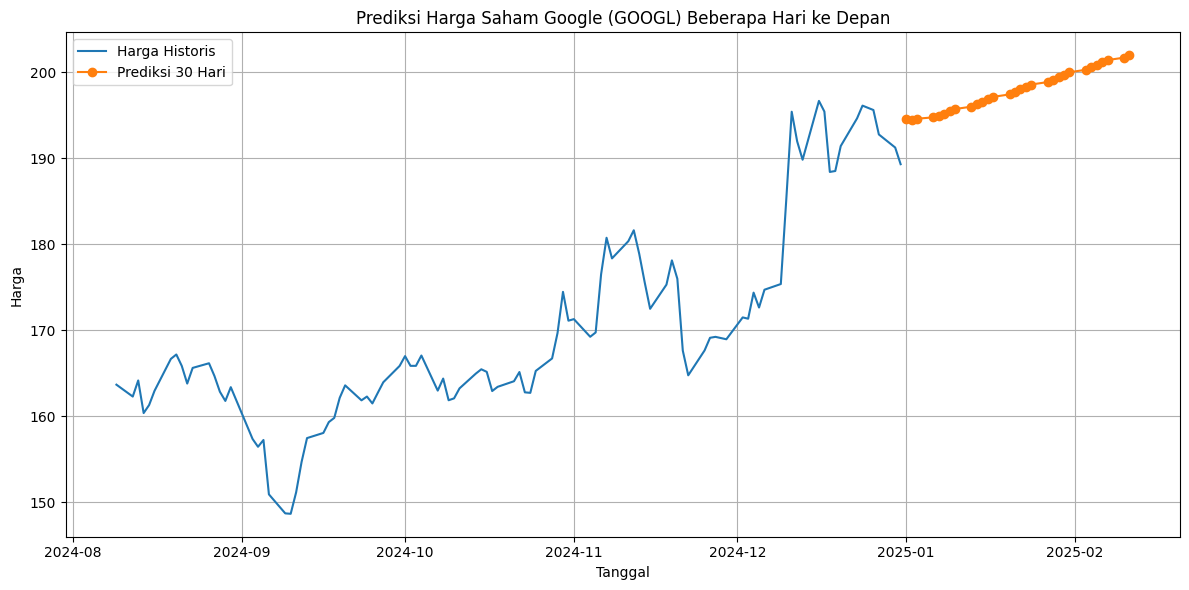

2025-01-01 : $194.50
2025-01-02 : $194.50
2025-01-03 : $194.59
2025-01-06 : $194.75
2025-01-07 : $194.95
2025-01-08 : $195.19
2025-01-09 : $195.45
2025-01-10 : $195.71
2025-01-13 : $195.99
2025-01-14 : $196.27
2025-01-15 : $196.56
2025-01-16 : $196.84
2025-01-17 : $197.13
2025-01-20 : $197.42
2025-01-21 : $197.70
2025-01-22 : $197.99
2025-01-23 : $198.28
2025-01-24 : $198.56
2025-01-27 : $198.85
2025-01-28 : $199.14
2025-01-29 : $199.42
2025-01-30 : $199.71
2025-01-31 : $199.99
2025-02-03 : $200.28
2025-02-04 : $200.56
2025-02-05 : $200.84
2025-02-06 : $201.12
2025-02-07 : $201.41
2025-02-10 : $201.69
2025-02-11 : $201.97


In [ ]:
# VISUAL
# df = df.set_index('Date') # Remove this line as 'Date' is already the index

# Make sure df has 'Date' as index if it was reset in previous cells
# If df was reset elsewhere, uncomment the line below:
# df = df.set_index('Date')

# Get the last date from the 'Date' column, not the index
last_date = df['Date'].iloc[-1]

# Calculate future dates starting from the day after the last date
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=len(predicted_prices), freq='B')

plt.figure(figsize=(12, 6))
# Use the 'Date' column for plotting historical data against its datetime values
plt.plot(df['Date'].tail(100), df['Close'].tail(100), label='Harga Historis')

# Create a DatetimeIndex for the predicted prices to match the plot requirements
# predicted_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=len(predicted_prices), freq='B') # This line was causing the error
plt.plot(future_dates, predicted_prices, label=f'Prediksi {len(predicted_prices)} Hari', marker='o') # Use future_dates and dynamic label


plt.title("Prediksi Harga Saham Google (GOOGL) Beberapa Hari ke Depan") # Generalize title
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Tampilkan hasil
# Ensure the number of future_dates matches the number of predicted_prices for printing
for tanggal, harga in zip(future_dates[:len(predicted_prices)], predicted_prices):
    print(f"{tanggal.date()} : ${harga[0]:.2f}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(predicted_prices, label="Prediksi Harga 30 Hari")
plt.title("Prediksi Harga Saham 30 Hari ke Depan")
plt.xlabel("Hari ke-")
plt.ylabel("Harga (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
future_df1 = model_df1.make_future_dataframe(periods=20)
forecast_aapl = model_df1.predict(future_df1)

model_df1.plot(forecast_aapl)
plt.title("Prediksi Harga Saham Google 30 Hari ke Depan")
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.grid(True)
plt.show()

# Time Series Part 2

In [ ]:
import pandas as pd

iwm = '/content/drive/MyDrive/Data set/Time series/iwm.us.txt'
qqq = '/content/drive/MyDrive/Data set/Time series/qqq.us.txt'
spy = '/content/drive/MyDrive/Data set/Time series/spy.us.txt'

print(iwm)

/content/drive/MyDrive/Data set/Time series/iwm.us.txt


In [ ]:
# List of full paths to the txt files
txt_file_paths = [iwm, qqq, spy]


import os # Import the os module
import csv # Import the csv module
import re # Import the re module


# Process each txt file
for txt_filepath in txt_file_paths:
    # Extract the base filename (e.g., 'iwm.us.txt')
    base_filename = os.path.basename(txt_filepath)
    # Create the corresponding csv filename (e.g., 'iwm.csv')
    csv_filename = base_filename.replace('.us.txt', '.csv')

    # Open the txt file using its full path and the csv file for writing
    with open(txt_filepath, 'r') as txt_file, open(csv_filename, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)

        # Process each line in the txt file
        for line in txt_file:
            # Split the line by one or more commas
            row = re.split(r',+', line.strip())
            writer.writerow(row)

    print(f"{txt_filepath} has been converted to {csv_filename}")


/content/drive/MyDrive/Data set/Time series/iwm.us.txt has been converted to iwm.csv
/content/drive/MyDrive/Data set/Time series/qqq.us.txt has been converted to qqq.csv
/content/drive/MyDrive/Data set/Time series/spy.us.txt has been converted to spy.csv


In [ ]:
iwm_df = pd.read_csv('iwm.csv')
qqq_df = pd.read_csv('qqq.csv')
spy_df = pd.read_csv('spy.csv')

print(iwm_df.head())
print(qqq_df.head())
print(spy_df.head())

         Date    Open    High     Low   Close    Volume  OpenInt
0  2005-02-25  56.435  57.475  56.435  57.457  26247480        0
1  2005-02-28  57.387  57.549  56.680  57.104  20106103        0
2  2005-03-01  57.277  57.692  57.104  57.540  21572012        0
3  2005-03-02  57.295  57.998  57.206  57.440  23344414        0
4  2005-03-03  57.702  57.856  57.104  57.484  19342075        0
         Date    Open    High     Low   Close    Volume  OpenInt
0  1999-03-10  45.722  45.750  44.967  45.665  11700414        0
1  1999-03-11  45.994  46.260  44.988  45.880  21670048        0
2  1999-03-12  45.721  45.749  44.406  44.770  19553768        0
3  1999-03-15  45.101  46.103  44.625  46.052  14245348        0
4  1999-03-16  46.253  46.643  45.749  46.447  10971066        0
         Date    Open    High     Low   Close    Volume  OpenInt
0  2005-02-25  104.77  106.00  104.68  105.79  70221808        0
1  2005-02-28  105.55  105.68  104.56  105.08  79695344        0
2  2005-03-01  105.22  10

In [ ]:
# Ambil kolom 'Date' dan 'Close' dari masing-masing DataFrame
iwm_close = iwm_df[['Date', 'Close']]
qqq_close = qqq_df[['Date', 'Close']]
spy_close = spy_df[['Date', 'Close']]

# Tampilkan head dari setiap DataFrame baru untuk verifikasi
print("IWM Close Data:")
print(iwm_close.head())
print("\nQQQ Close Data:")
print(qqq_close.head())
print("\nSPY Close Data:")
print(spy_close.head())

IWM Close Data:
         Date   Close
0  2005-02-25  57.457
1  2005-02-28  57.104
2  2005-03-01  57.540
3  2005-03-02  57.440
4  2005-03-03  57.484

QQQ Close Data:
         Date   Close
0  1999-03-10  45.665
1  1999-03-11  45.880
2  1999-03-12  44.770
3  1999-03-15  46.052
4  1999-03-16  46.447

SPY Close Data:
         Date   Close
0  2005-02-25  105.79
1  2005-02-28  105.08
2  2005-03-01  105.62
3  2005-03-02  105.57
4  2005-03-03  105.61


In [ ]:
# Mengubah nama kolom 'Close' di masing-masing DataFrame
iwm_close = iwm_close.rename(columns={'Close': 'Close_IWM'})
qqq_close = qqq_close.rename(columns={'Close': 'Close_QQQ'})
spy_close = spy_close.rename(columns={'Close': 'Close_SPY'})

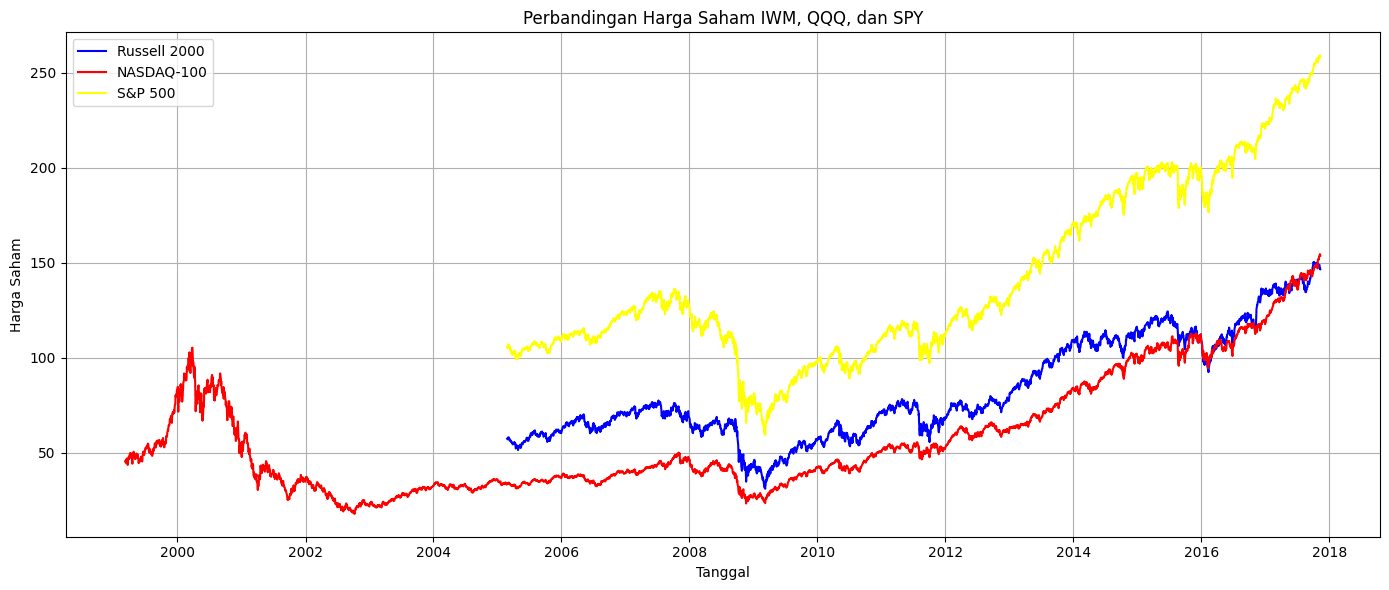

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(iwm_close['Date'], iwm_close['Close_IWM'], label='Russell 2000', color="blue")
plt.plot(qqq_close['Date'], qqq_close['Close_QQQ'], label='NASDAQ-100', color="red")
plt.plot(spy_close['Date'], spy_close['Close_SPY'], label='S&P 500', color="YELLOW")


plt.title("Perbandingan Harga Saham IWM, QQQ, dan SPY")
plt.xlabel("Tanggal")
plt.ylabel("Harga Saham")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo0tqx1ht/z85ukmau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo0tqx1ht/5czlrktg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3959', 'data', 'file=/tmp/tmpo0tqx1ht/z85ukmau.json', 'init=/tmp/tmpo0tqx1ht/5czlrktg.json', 'output', 'file=/tmp/tmpo0tqx1ht/prophet_modelb0abg15p/prophet_model-20250723160935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo0t

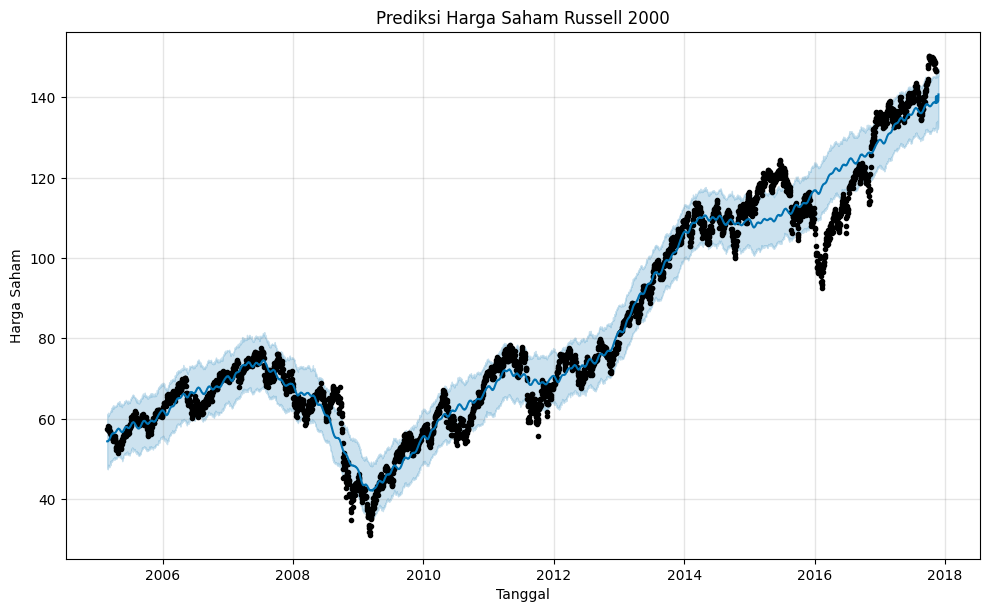

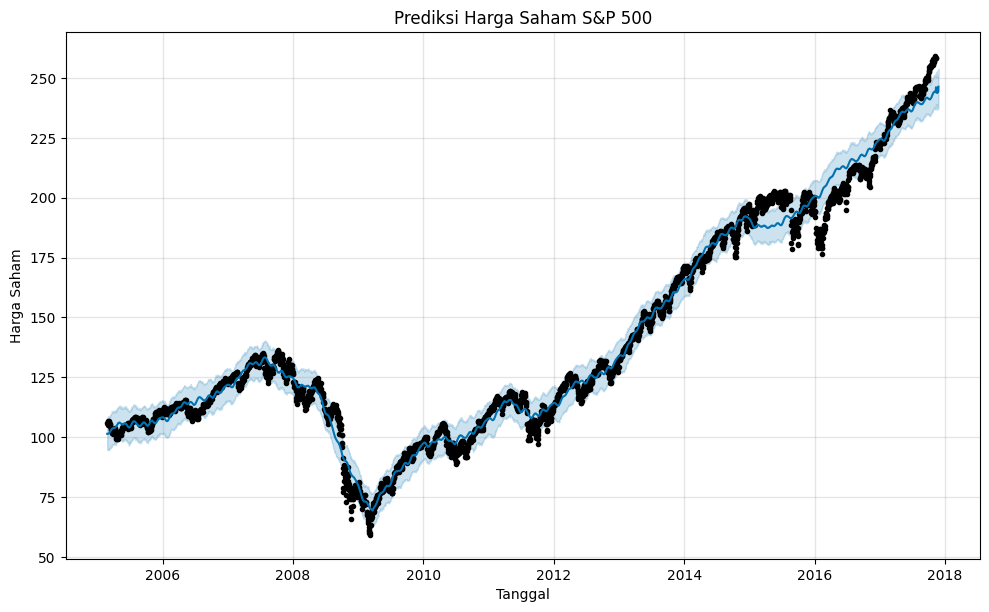

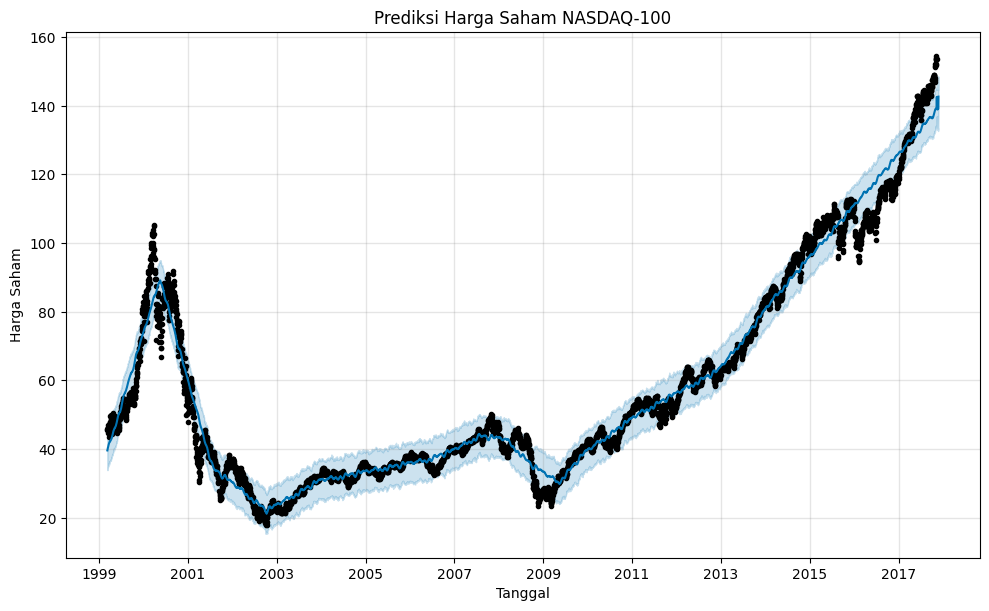

In [ ]:
# Format tanggal dan hilangkan timezone
iwm_close['Date'] = pd.to_datetime(iwm_close['Date']).dt.tz_localize(None)
spy_close['Date'] = pd.to_datetime(spy_close['Date']).dt.tz_localize(None)
qqq_close['Date'] = pd.to_datetime(qqq_close['Date']).dt.tz_localize(None)

# Siapkan DataFrame untuk Prophet (sesuai format 'ds' dan 'y')
# Pastikan menggunakan DataFrame yang sudah di-rename kolom Close-nya
iwm_df = iwm_close[['Date','Close_IWM']].rename(columns={'Date':'ds','Close_IWM':'y'})
spy_df = spy_close[['Date','Close_SPY']].rename(columns={'Date':'ds','Close_SPY':'y'})
qqq_df = qqq_close[['Date','Close_QQQ']].rename(columns={'Date':'ds','Close_QQQ':'y'})

# Model iwm
model_iwm = Prophet()
model_iwm.fit(iwm_df)
future_iwm = model_iwm.make_future_dataframe(periods=15)
forecast_iwm = model_iwm.predict(future_iwm)

# Model spy
model_spy = Prophet()
model_spy.fit(spy_df)
future_spy = model_spy.make_future_dataframe(periods=15)
forecast_spy = model_spy.predict(future_spy)

# Model qqq
model_qqq = Prophet()
# Correcting the training data for the QQQ model
model_qqq.fit(qqq_df)
future_qqq = model_qqq.make_future_dataframe(periods=15)
forecast_qqq = model_qqq.predict(future_qqq)

# Plot
model_iwm.plot(forecast_iwm, xlabel='Tanggal', ylabel='Harga Saham')
plt.title("Prediksi Harga Saham Russell 2000")
plt.show()

model_spy.plot(forecast_spy, xlabel='Tanggal', ylabel='Harga Saham')
plt.title("Prediksi Harga Saham S&P 500")
plt.show()

model_qqq.plot(forecast_qqq, xlabel='Tanggal', ylabel='Harga Saham')
plt.title("Prediksi Harga Saham NASDAQ-100")
plt.show()

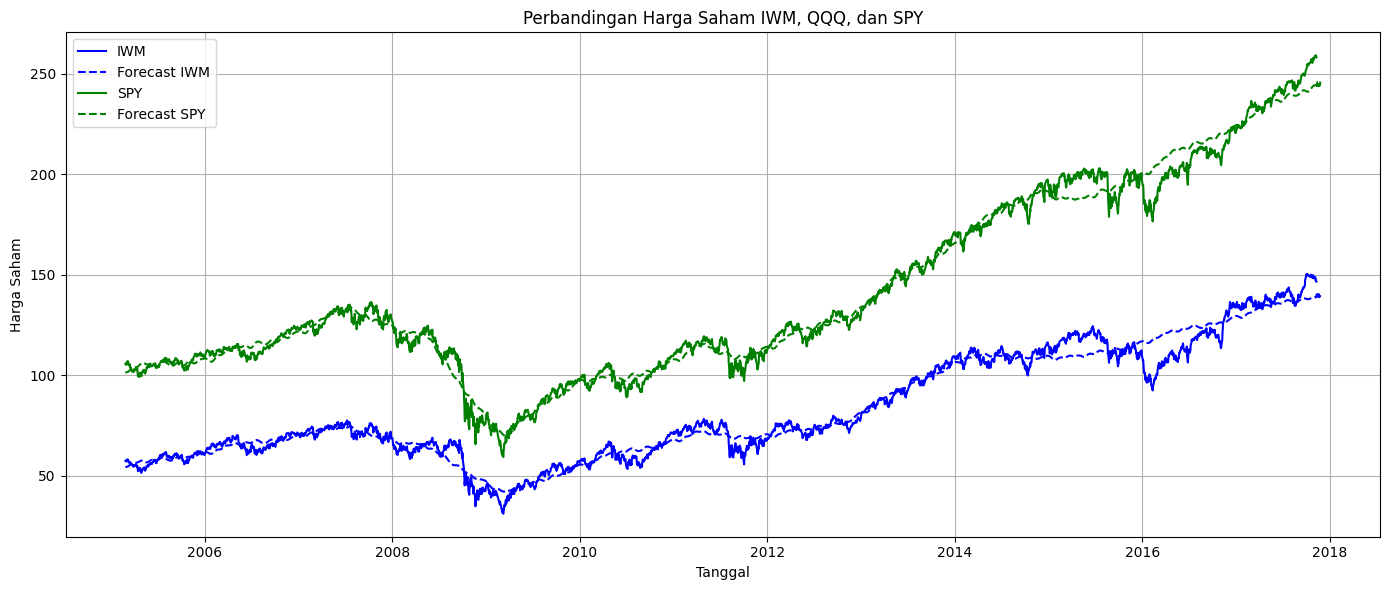

In [ ]:
# Plot PERBANDINGAN

plt.figure(figsize=(14, 6))

# Convert 'ds' columns to datetime objects to ensure matplotlib handles them correctly
forecast_iwm['ds'] = pd.to_datetime(forecast_iwm['ds'])
forecast_spy['ds'] = pd.to_datetime(forecast_spy['ds'])
forecast_qqq['ds'] = pd.to_datetime(forecast_qqq['ds'])


plt.plot(iwm_df['ds'], iwm_df['y'], label='IWM', color="blue")
plt.plot(forecast_iwm['ds'], forecast_iwm['yhat'], label='Forecast IWM', color="blue", linestyle='--')

plt.plot(spy_df['ds'], spy_df['y'], label='SPY', color="green")
plt.plot(forecast_spy['ds'], forecast_spy['yhat'], label='Forecast SPY', color="green", linestyle='--')



plt.title("Perbandingan Harga Saham IWM, QQQ, dan SPY") # Corrected the title to reflect the plotted data
plt.xlabel("Tanggal")
plt.ylabel("Harga Saham")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

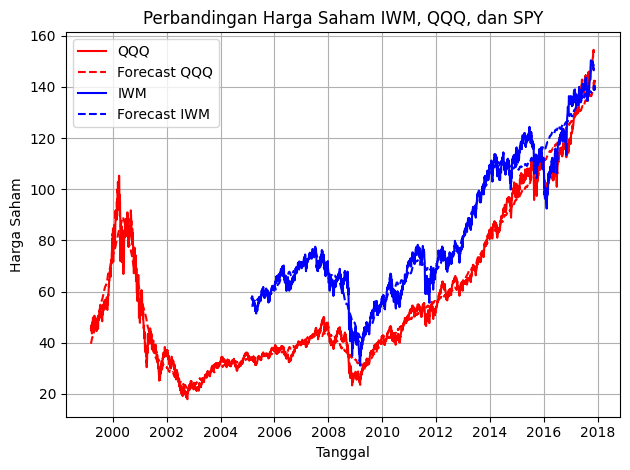

In [ ]:
# Corrected the label and the forecast variable for the QQQ plot
plt.plot(qqq_df['ds'], qqq_df['y'], label='QQQ', color="red")
plt.plot(forecast_qqq['ds'], forecast_qqq['yhat'], label='Forecast QQQ', color="red", linestyle='--')

plt.plot(iwm_df['ds'], iwm_df['y'], label='IWM', color="blue")
plt.plot(forecast_iwm['ds'], forecast_iwm['yhat'], label='Forecast IWM', color="blue", linestyle='--')



plt.title("Perbandingan Harga Saham IWM, QQQ, dan SPY") # Corrected the title to reflect the plotted data
plt.xlabel("Tanggal")
plt.ylabel("Harga Saham")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


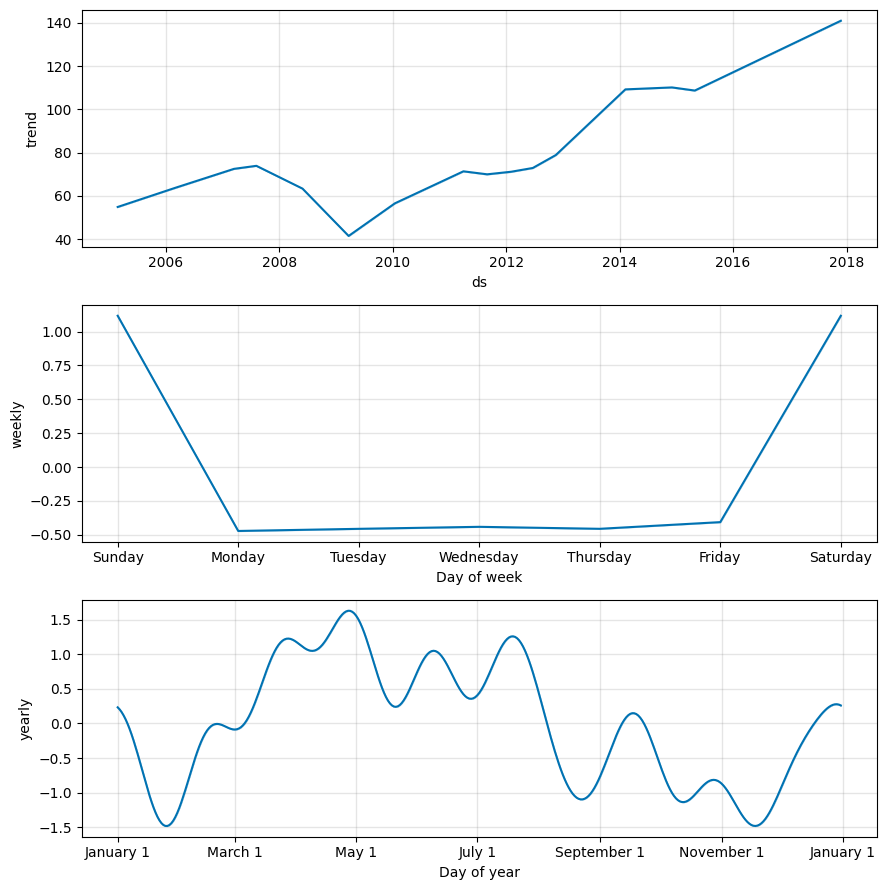

In [ ]:
# Plot the components of the forecast for each model separately

# Plot components for IWM model and change line color
fig_iwm_components = model_iwm.plot_components(forecast_iwm)
 # Set the color of the line to blue
plt.show()



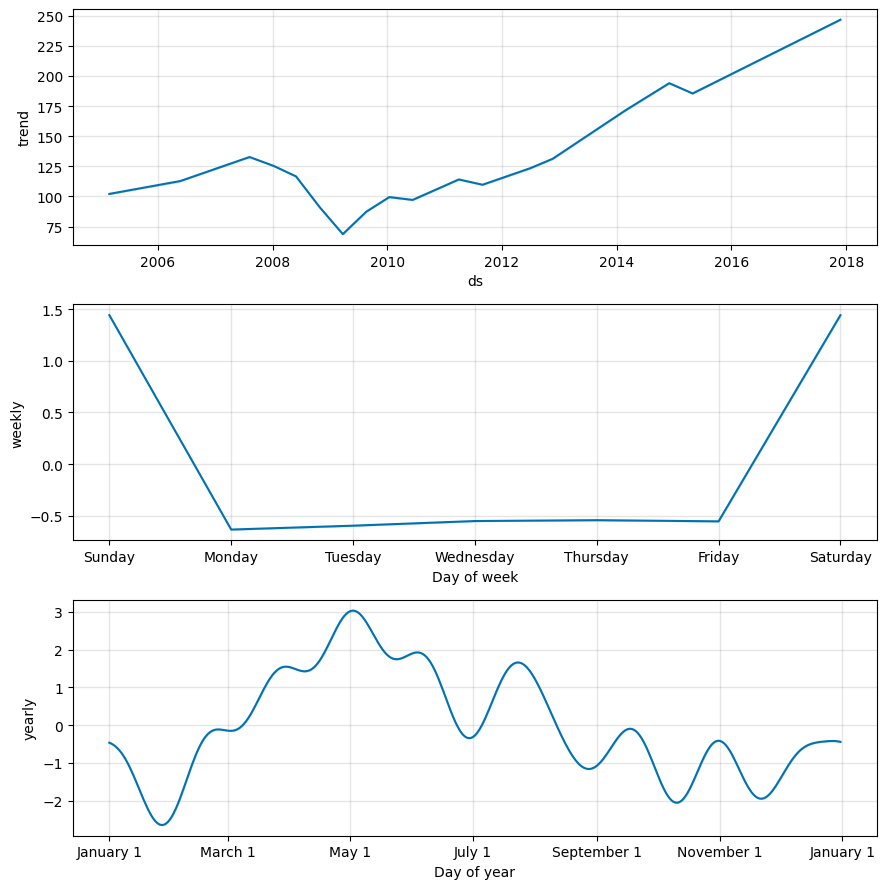

In [ ]:
# Plot components for SPY model
fig_spy_components = model_spy.plot_components(forecast_spy)
plt.show()

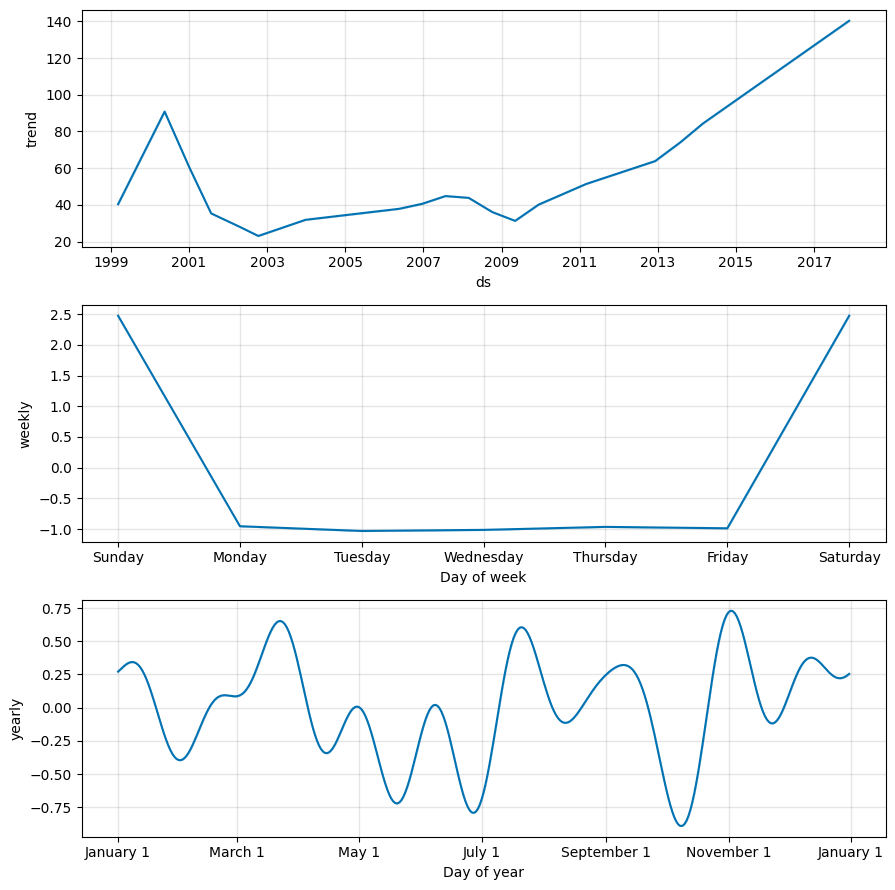

In [ ]:

# Plot components for QQQ model
fig_qqq_components = model_qqq.plot_components(forecast_qqq)
plt.show()